# Chapter 4 - Normal distribution: Practice Exercises with Solutions
---

**Exercise 1:** Jane and Mark both run in the 1000 metres, a popular track race in the olympics. Jane competed in the Women, Ages 20 - 24 group, while Mark competed in the Men, Ages 25 - 29 group. Jane completed the race in 246 seconds, while Mark completed the race in 221 seconds.

Obviously Mark finished faster, but they are curious about how they did within their respective groups. Here is some information on the performance of their groups:
- The finishing times of the Women, Ages 20 - 24 group has a mean of 224 seconds with a standard deviation of 46 seconds.
- The finishing times of the Men, Ages 25 - 29 group has a mean of 181 seconds with a standard deviation of 35 seconds.
- The distributions of finishing times for both groups are nearly normal. 

Keep in mind that a better performance corresponds to a faster finish.

A) What are the Z-scores for Jane's and Mark's finishing times? What do these Z-scores tell you?

B) Did Jane or Mark rank better in their respective groups? Explain your reasoning.

C) What percent of the runners did Mark finish faster than in his group?

D) What percent of the runners did Jane finish faster than in her group?

**Hint:** Use `norm` function from [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html?highlight=norm).

In [1]:
from scipy.stats import norm

z_jane = round((246 - 224)/46, 2)
z_mark = round((221 - 181)/35, 2)

print("A) Z-score for Jane's finishing times = ", z_jane)

print("   Z-score for Mark's finishing times = ", z_mark)
print(f'''
   Jane finished {z_jane} standard deviations above the mean of her group's finishing times and
   Mark finished {z_mark} standard deviations above the mean of his group's finishing times.''')

print(f'''
B) While Mark finished {z_mark} standard deviations above the mean of his group's finishing times,
   Jane finished only {z_jane} standard deviations above the mean of her group's finishing times.
   Therefore, Jane ranked better in her group than Mark did in his group.''')

print('''
C) P(Z > 1.14) = 1 − P(Z < 1.14) =''', 1 - norm.cdf(z_mark).round(4))
print('   Mark finished fasther than 12.7% of the runners in his group.')

print('''
D) P(Z > 0.48) = 1 − P(Z < 0.48) =''', 1 - norm.cdf(z_jane).round(4))
print('   Jane finished faster than 31.5% of the runners in her group.')

A) Z-score for Jane's finishing times =  0.48
   Z-score for Mark's finishing times =  1.14

   Jane finished 0.48 standard deviations above the mean of her group's finishing times and
   Mark finished 1.14 standard deviations above the mean of his group's finishing times.

B) While Mark finished 1.14 standard deviations above the mean of his group's finishing times,
   Jane finished only 0.48 standard deviations above the mean of her group's finishing times.
   Therefore, Jane ranked better in her group than Mark did in his group.

C) P(Z > 1.14) = 1 − P(Z < 1.14) = 0.1271
   Mark finished fasther than 12.7% of the runners in his group.

D) P(Z > 0.48) = 1 − P(Z < 0.48) = 0.3156
   Jane finished faster than 31.5% of the runners in her group.


---

**Exercise 2:** Suppose weights of airline passengers' checked baggage follow a nearly normal distribution with mean 20 kg and standard deviation 1.45 kg. Most airlines charge a fee for baggage that weigh in excess of 22 kg. Determine what percent of airline passengers incur this fee.

In [2]:
from scipy.stats import norm

# Since the question does not ask us to compute the Z-score, we can directly use norm.cdf with loc = 20 and scale = 1.45
print('P(Z > 1.38) = 1 − P(Z < 1.38) = ', round(1 - norm.cdf(x = 22, loc = 20, scale = 1.45), 2))
print('8% of airline passengers incur this fee.')

P(Z > 1.38) = 1 − P(Z < 1.38) =  0.08
8% of airline passengers incur this fee.


---

**Exercise 3:** Suppose the distribution of auto insurance premiums for residents of California is approximately normal with a mean of USD 1,650 and a standard deviation of USD 223.

A) What is the Z-score that corresponds to the top 25% of the standard normal
distribution?

B) What is the cutoff point for the top 25% of Californian residents?

In [3]:
from scipy.stats import norm

z_top25 = norm.ppf(0.75).round(2)
print(f'A) The Z score corresponding to the upper 25% of the distribution is {z_top25}.')
print()

cutoff_top25 = norm.ppf(q = 0.75, loc = 1650, scale = 223).round(1)
print(f'''B) The cutoff point for the top 25% of Californian residents is {cutoff_top25}. 
   In other words, top 25% of Californian residents pay more than $1,800 for auto insurance premiums.''')

A) The Z score corresponding to the upper 25% of the distribution is 0.67.

B) The cutoff point for the top 25% of Californian residents is 1800.4. 
   In other words, top 25% of Californian residents pay more than $1,800 for auto insurance premiums.


---

**Exercise 4:** Cholesterol levels for men aged 55 to 64 are normally distributed with mean 222 milligrams per deciliter (mg/dl) and standard deviation 37 mg/dL. A cholesterol level above 240 is a health concern. Find the proportion of the men population aged 55 to 64 with a cholesterol level above 240.

In [4]:
from scipy.stats import norm

prob_above240 = 1 - norm.cdf(x = 240, loc = 222, scale = 37).round(2)

print(f'''The proportion of the men population aged 55 to 64 that has a cholesterol level above 240 is {prob_above240.round(2)}.
In other words, 31% of men aged 55 to 64 have cholesterol levels greater than 240.''')

The proportion of the men population aged 55 to 64 that has a cholesterol level above 240 is 0.31.
In other words, 31% of men aged 55 to 64 have cholesterol levels greater than 240.


---

For **Exercise 5** and **Exercise 6**, you will be working with body measurements of 507 physically active individuals. The data set contains measurements from 260 women and 247 men. Click [here](https://www.openintro.org/stat/data/bdims.csv) to download the dataset and read it as `bdims`. You can visit [this page](https://www.openintro.org/data/index.php?data=bdims) to view the details of this data set.

---

**Exercise 5:** Make a histogram of women's heights and a histogram of men's heights. How would you compare the various aspects of the two distributions?

**Hint:** `sex = 0` means female, otherwise male.

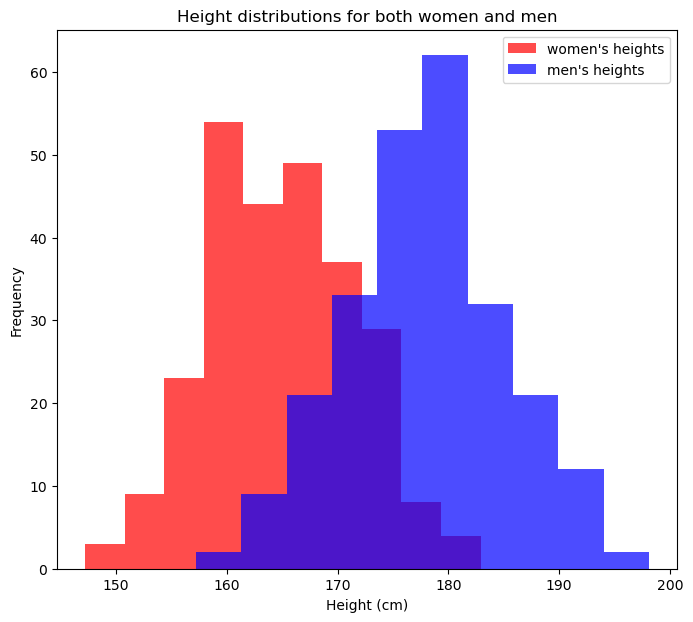

Both distributions roughly follow the normal distribution.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (8, 7)

bdims = pd.read_csv('datasets/bdims.csv')

# Create two data sets: one with only women and one with only men
fdims = bdims[bdims['sex'] == 0]
mdims = bdims[bdims['sex'] == 1]

plt.hist(fdims['hgt'], color = 'r', alpha = 0.70, label = "women's heights")
plt.hist(mdims['hgt'], color = 'b', alpha = 0.70, label = "men's heights")

plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.title('Height distributions for both women and men')
plt.legend()
plt.show();

print('Both distributions roughly follow the normal distribution.')

---

**Exercise 6:** Assuming that men's heights are normally distributed, what is the probability that a randomly chosen young adult man is taller than 190 cm?

In [6]:
from scipy.stats import norm

mhgtmean = mdims['hgt'].mean()
mhgtsd =  mdims['hgt'].std()

prob_above190 = 1 - norm.cdf(x = 190, loc = mhgtmean, scale = mhgtsd )

print('The probability that a randomly chosen young adult man is taller than 190 cm is', prob_above190.round(4))

The probability that a randomly chosen young adult man is taller than 190 cm is 0.044
